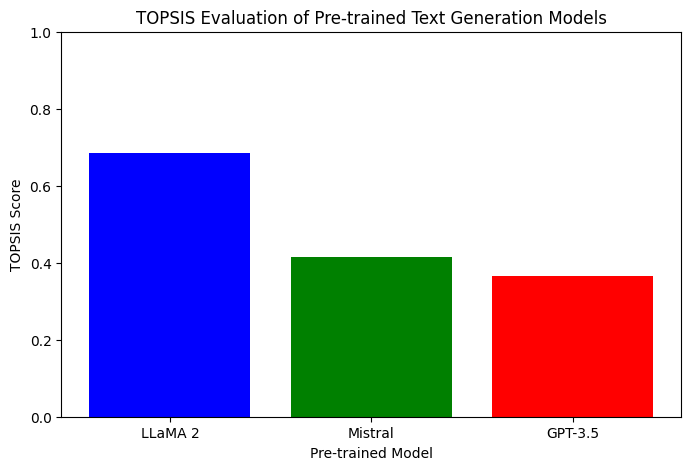

Ranking of Models Based on TOPSIS Score:
     Model  TOPSIS Score
0  LLaMA 2      0.686233
1  Mistral      0.414214
2  GPT-3.5      0.366025


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Define the decision matrix (rows: models, columns: criteria)
models = ["GPT-3.5", "LLaMA 2", "Mistral"]
criteria = ["Perplexity", "BLEU", "ROUGE", "BERTScore", "Inference Time", "Memory"]

# Sample values (lower is better for Perplexity, Inference Time, and Memory)
data = np.array([
    [15.2, 0.78, 0.72, 0.85, 0.9, 8],  # GPT-3.5
    [14.8, 0.80, 0.74, 0.86, 0.8, 6],  # LLaMA 2
    [13.5, 0.76, 0.70, 0.84, 0.7, 5]   # Mistral
])

# Define weights (importance of each criterion)
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.1, 0.1])

# Benefit (higher is better) and Cost (lower is better) criteria
benefit_criteria = [False, True, True, True, False, False]  # True for benefit, False for cost

# Normalize the decision matrix
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)
for i in range(len(benefit_criteria)):
    if not benefit_criteria[i]:  # If it's a cost criterion, invert it
        normalized_data[:, i] = 1 - normalized_data[:, i]

# Multiply by weights
weighted_data = normalized_data * weights

# Identify ideal and negative-ideal solutions
ideal_solution = np.max(weighted_data, axis=0)
negative_ideal_solution = np.min(weighted_data, axis=0)

# Compute separation measures
s_plus = np.sqrt(np.sum((weighted_data - ideal_solution) ** 2, axis=1))
s_minus = np.sqrt(np.sum((weighted_data - negative_ideal_solution) ** 2, axis=1))

# Compute TOPSIS score
scores = s_minus / (s_plus + s_minus)
rankings = np.argsort(scores)[::-1]  # Higher score is better

# Create DataFrame for results
results_df = pd.DataFrame({"Model": models, "TOPSIS Score": scores})
results_df = results_df.iloc[rankings].reset_index(drop=True)

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(results_df["Model"], results_df["TOPSIS Score"], color=['blue', 'green', 'red'])
plt.xlabel("Pre-trained Model")
plt.ylabel("TOPSIS Score")
plt.title("TOPSIS Evaluation of Pre-trained Text Generation Models")
plt.ylim(0, 1)
plt.show()

# Print rankings
print("Ranking of Models Based on TOPSIS Score:")
print(results_df)
